In [110]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [232]:
bbri = web.DataReader('BBRI.jk',
                    data_source='yahoo',
                    start='2003-12-23',
                    end='2020-10-22')

display(bbri.head())
display(bbri.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-23,127.5,122.5,125.0,125.0,278485000.0,1.760418
2003-12-29,125.0,120.0,125.0,125.0,267980000.0,1.760418
2003-12-30,125.0,122.5,125.0,125.0,307350000.0,1.760418
2004-01-02,127.5,122.5,125.0,127.5,228115000.0,1.795627
2004-01-05,127.5,122.5,125.0,127.5,343335000.0,1.795627


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,3290.0,3230.0,3260.0,3280.0,96199300.0,3280.0
2020-10-20,3290.0,3210.0,3280.0,3250.0,134038300.0,3250.0
2020-10-21,3310.0,3230.0,3280.0,3240.0,116981800.0,3240.0
2020-10-22,3300.0,3200.0,3220.0,3300.0,160136600.0,3300.0
2020-10-23,3350.0,3270.0,3350.0,3300.0,77115900.0,3300.0


In [233]:
bbni = web.DataReader('BBNI.jk',
                    data_source='yahoo',
                    start='2003-12-23',
                    end='2020-10-22')

display(bbni.head())
display(bbni.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-23,1327.199951,1232.400024,1232.400024,1232.400024,426687.0,728.547791
2003-12-29,1303.500000,1232.400024,1232.400024,1303.500000,159810.0,770.579285
2003-12-30,1303.500000,1232.400024,1303.500000,1232.400024,365506.0,728.547791
2004-01-02,1256.099976,1232.400024,1232.400024,1232.400024,71730.0,728.547791
2004-01-05,1256.099976,1232.400024,1232.400024,1232.400024,313290.0,728.547791


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,4900.0,4820.0,4850.0,4890.0,36507600.0,4890.0
2020-10-20,4890.0,4810.0,4870.0,4810.0,28628400.0,4810.0
2020-10-21,4930.0,4850.0,4850.0,4880.0,44696300.0,4880.0
2020-10-22,4880.0,4830.0,4830.0,4860.0,22289100.0,4860.0
2020-10-23,4900.0,4850.0,4860.0,4860.0,13863900.0,4860.0


In [234]:
bmri = web.DataReader('BMRI.jk',
                    data_source='yahoo',
                    start='2003-12-23',
                    end='2020-10-22')

display(bmri.head())
display(bmri.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-23,516.234009,491.652008,503.942993,503.942993,131619586.0,180.394806
2003-12-29,503.942993,491.652008,503.942993,503.942993,25004487.0,180.394806
2003-12-30,503.942993,479.359985,503.942993,491.652008,52019544.0,175.995071
2004-01-02,503.942993,479.359985,491.652008,491.652008,60528616.0,175.995071
2004-01-05,528.526001,491.652008,503.942993,516.234009,163827342.0,184.794632


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,5725.0,5575.0,5600.0,5700.0,29468100.0,5700.0
2020-10-20,5750.0,5600.0,5725.0,5650.0,38606600.0,5650.0
2020-10-21,5725.0,5475.0,5675.0,5525.0,56950900.0,5525.0
2020-10-22,5550.0,5400.0,5500.0,5450.0,69350700.0,5450.0
2020-10-23,5550.0,5475.0,5525.0,5525.0,18449300.0,5525.0


In [235]:
jago = web.DataReader('ARTO.JK',
                    data_source='yahoo',
                    start='2003-12-23',
                    end='2020-10-22')

display(jago.head())
display(jago.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-12,199.0,141.0,145.0,173.0,25182100.0,173.0
2016-01-13,179.0,158.0,174.0,161.0,7038900.0,161.0
2016-01-14,159.0,145.0,159.0,145.0,2414200.0,145.0
2016-01-15,145.0,133.0,145.0,134.0,855100.0,134.0
2016-01-18,174.0,123.0,134.0,128.0,11292700.0,128.0


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,2710.0,2590.0,2710.0,2600.0,181900.0,2600.0
2020-10-20,2740.0,2600.0,2600.0,2700.0,467700.0,2700.0
2020-10-21,2700.0,2700.0,2700.0,2700.0,18800.0,2700.0
2020-10-22,2700.0,2660.0,2700.0,2670.0,168600.0,2670.0
2020-10-23,2720.0,2690.0,2700.0,2700.0,152400.0,2700.0


In [236]:
bbri['Daily Return'] = bbri['Adj Close'].pct_change()
bbni['Daily Return'] = bbni['Adj Close'].pct_change()
bmri['Daily Return'] = bmri['Adj Close'].pct_change()
jago['Daily Return'] = jago['Adj Close'].pct_change()

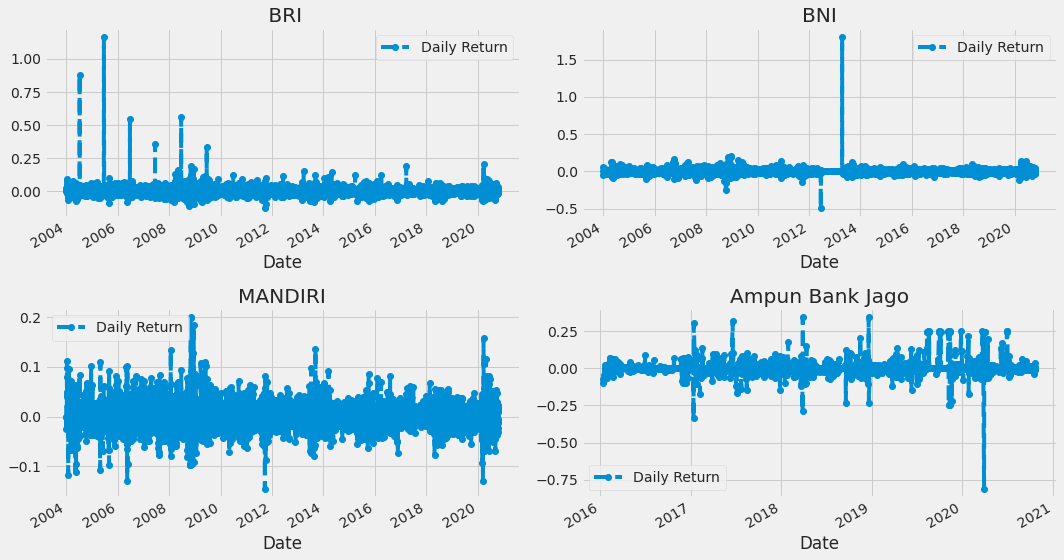

In [237]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

bbri['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(' BRI')

bbni['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('BNI')

bmri['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MANDIRI')

jago['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Ampun Bank Jago')

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'BRI')

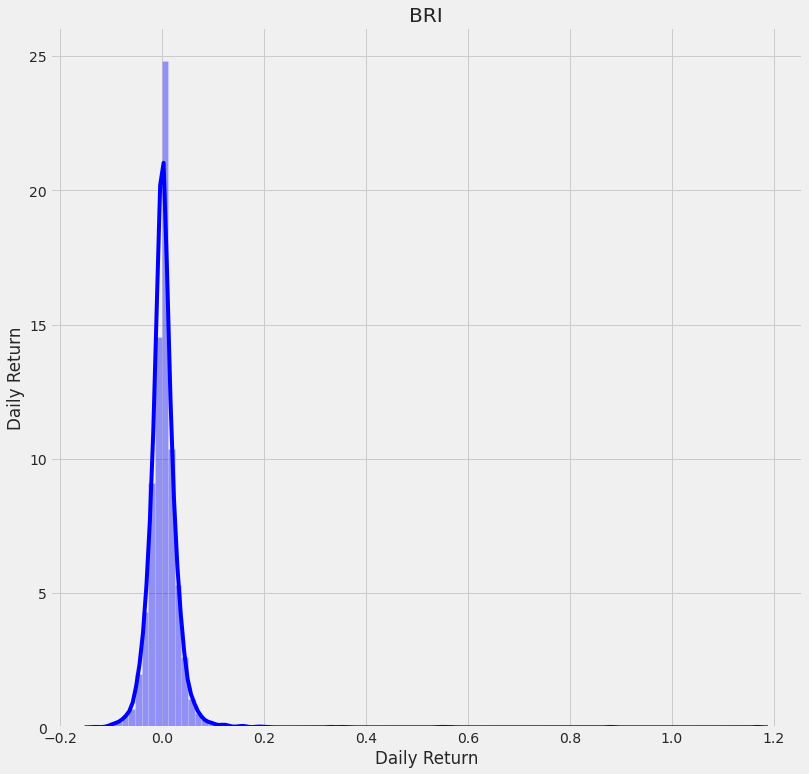

In [238]:
plt.figure(figsize=(12, 12))
plt.subplots
sns.distplot(bbri['Daily Return'].dropna(), bins=100, color='blue')
plt.ylabel('Daily Return')
plt.title(f'BRI')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'BNI')

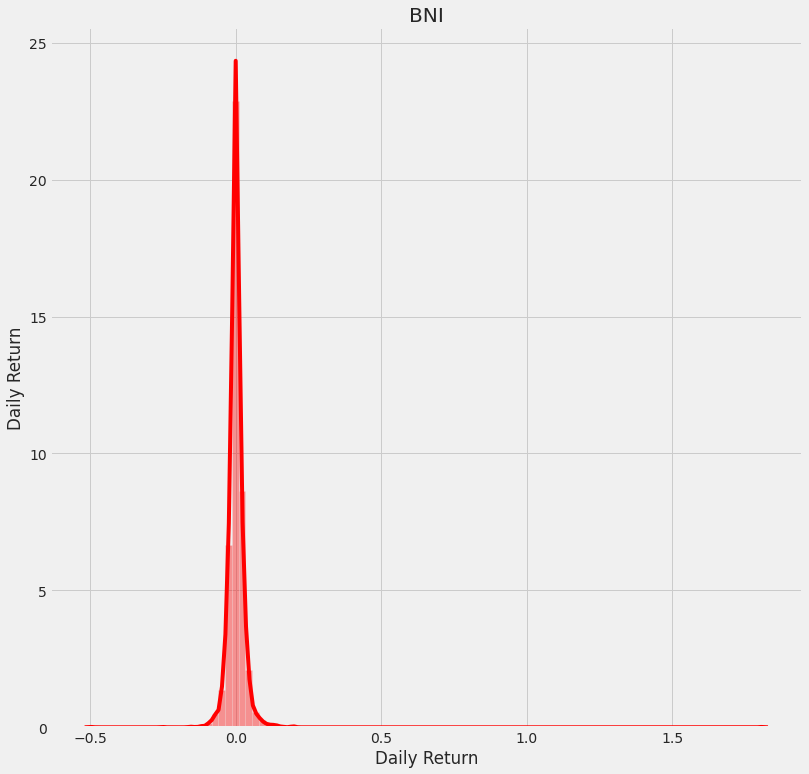

In [239]:
plt.figure(figsize=(12, 12))
plt.subplots
sns.distplot(bbni['Daily Return'].dropna(), bins=100, color='red')
plt.ylabel('Daily Return')
plt.title(f'BNI')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'MANDIRI')

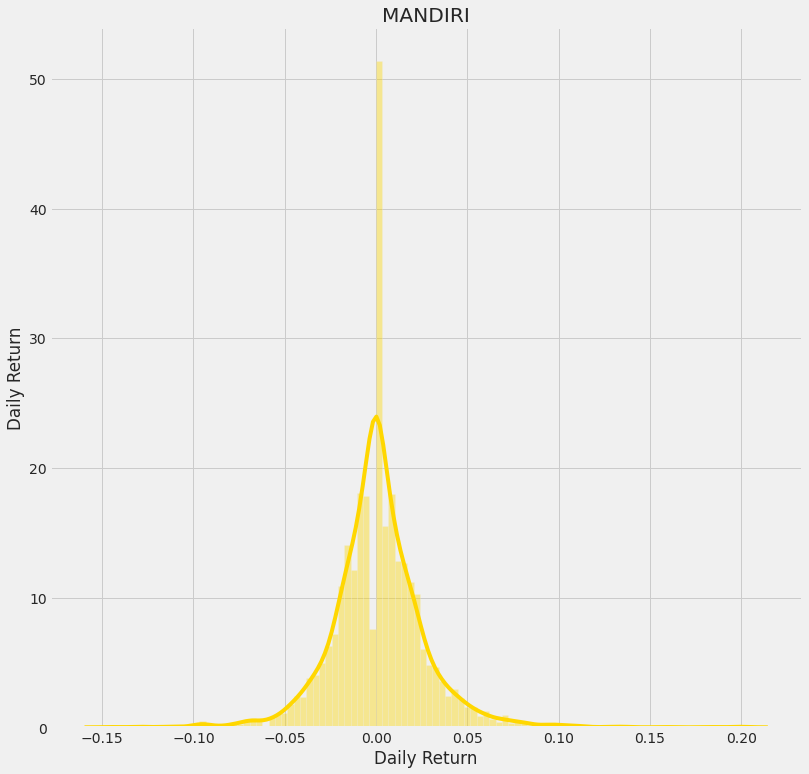

In [240]:
plt.figure(figsize=(12, 12))
plt.subplots
sns.distplot(bmri['Daily Return'].dropna(), bins=100, color='gold')
plt.ylabel('Daily Return')
plt.title(f'MANDIRI')

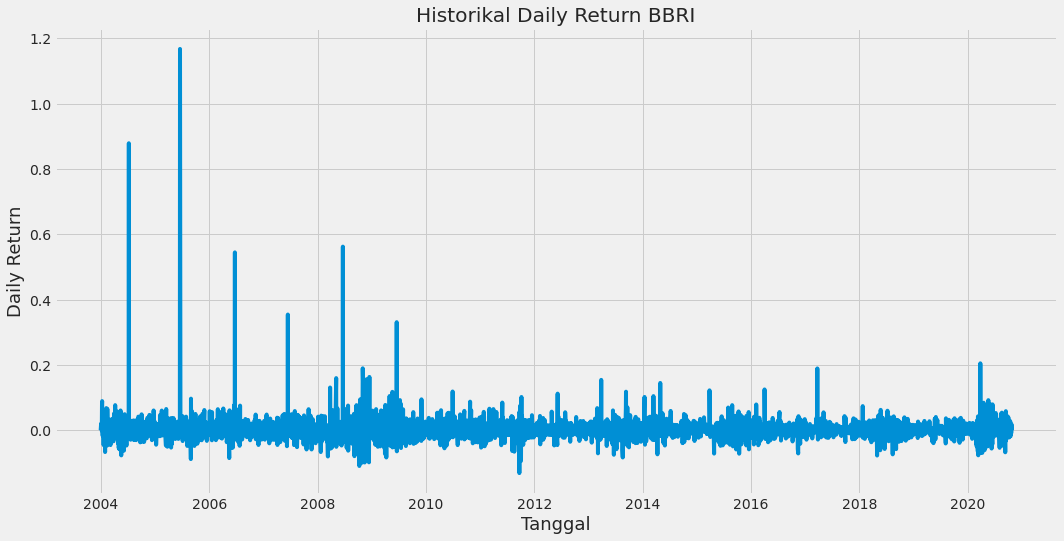

In [241]:
plt.figure(figsize=(16,8))
plt.title('Historikal Daily Return BBRI')
plt.plot(bbri['Daily Return'])
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Daily Return', fontsize=18)
plt.show()

In [242]:
bbri['Daily Return'].value_counts()

 0.000000    621
 0.007407      6
 0.014706      5
-0.014286      4
 0.007463      4
            ... 
-0.002865      1
-0.014493      1
 0.005000      1
-0.002457      1
-0.020000      1
Name: Daily Return, Length: 3166, dtype: int64

In [243]:
bbni['Daily Return'].value_counts()

 0.000000    938
-0.019608      7
-0.019231      5
 0.006329      5
-0.012346      5
            ... 
-0.005128      1
-0.022472      1
 0.009709      1
 0.009091      1
-0.019867      1
Name: Daily Return, Length: 2812, dtype: int64

In [244]:
bmri['Daily Return'].value_counts()

 0.000000    631
 0.007353      5
-0.002369      4
 0.014389      4
 0.016947      4
            ... 
 0.024814      1
 0.010127      1
-0.040542      1
 0.198718      1
 0.099035      1
Name: Daily Return, Length: 3078, dtype: int64

In [245]:
tech_list = ['BBRI.JK', 'BBNI.JK', 'BMRI.JK']
start=('2003-12-23')
end=('2020-10-23')
for stock in tech_list: 
  globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [246]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [247]:
closing_df.head() 

Symbols,BBRI.JK,BBNI.JK,BMRI.JK
Date,,,
2003-12-23,1.760418,728.547791,180.394806
2003-12-29,1.760418,770.579285,180.394806
2003-12-30,1.760418,728.547791,175.995071
2004-01-02,1.795627,728.547791,175.995071
2004-01-05,1.795627,728.547791,184.794632


In [248]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,BBRI.JK,BBNI.JK,BMRI.JK
Date,,,
2003-12-23,NaN,NaN,NaN
2003-12-29,0.00,0.057692,0.000000
2003-12-30,0.00,-0.054545,-0.024389
2004-01-02,0.02,0.000000,0.000000
2004-01-05,0.00,0.000000,0.049999


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



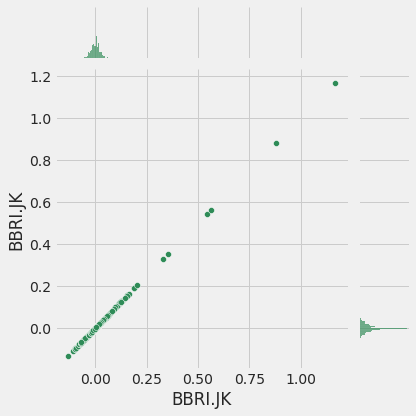

In [249]:
sns.jointplot('BBRI.JK', 'BBRI.JK', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



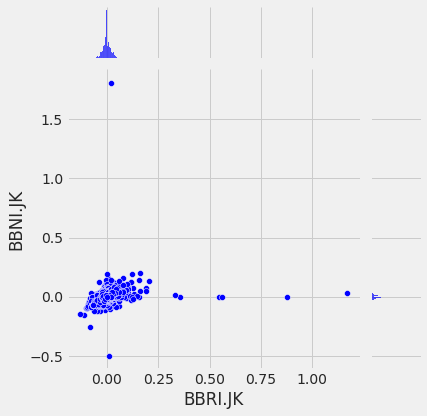

In [250]:
sns.jointplot('BBRI.JK', 'BBNI.JK', tech_rets, kind='scatter', color='blue')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



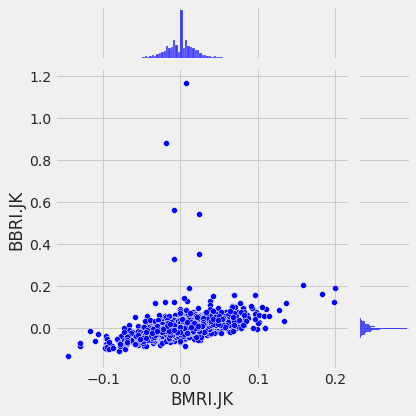

In [251]:
sns.jointplot('BMRI.JK', 'BBRI.JK', tech_rets, kind='scatter', color='blue')

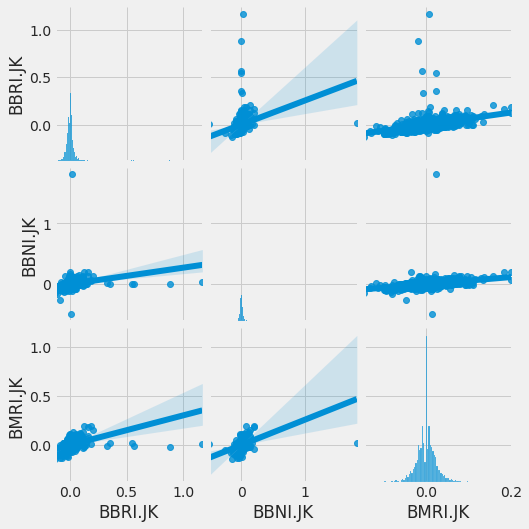

In [252]:
sns.pairplot(tech_rets, kind='reg')

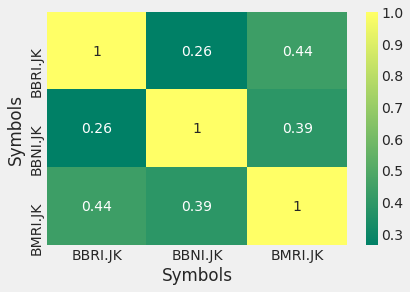

In [253]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

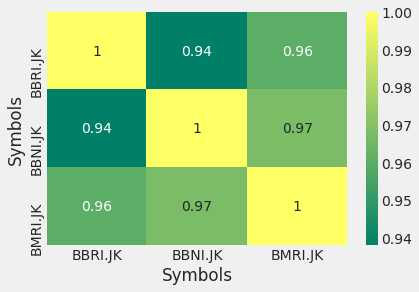

In [254]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')